In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

## Collecting tweets on COVID-19

In [3]:
## defining keys

consumer_key= 'my_consumer_key'
consumer_secret= 'my_consumer_secret'
access_token= 'my_token'
access_token_secret= 'my_token_secret'

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [4]:
### collecting and cleaning 1000 tweets on covid

def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

# Create a custom search term and define the number of tweets
search_term = "#covid19 OR #covid-19 OR covid-19 OR covid19 OR #coronavirus OR coronavirus -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2020-02-24').items(1000)

# Remove URLs
tweets_no_urls = [remove_url(tweet.text) for tweet in tweets]

In [5]:
len(tweets_no_urls)

1000

In [6]:
type(tweets_no_urls)

list

## Sentiment analysis using TextBlob

In [7]:
# Create textblob objects of the collected tweets
sentiment_objects = [TextBlob(tweet) for tweet in tweets_no_urls]

sentiment_objects[1].polarity, sentiment_objects[1]

(-0.025,
 TextBlob("if you can hold the last long note in dont forget about us it is proof that you do not have the coronavirus"))

In [8]:
# Create list of polarity values and tweet texts
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_values[1]

[-0.025,
 'if you can hold the last long note in dont forget about us it is proof that you do not have the coronavirus']

In [9]:
# Create dataframe containing the polarity value and tweet text
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity_score", "tweet"])
pd.set_option('display.max_colwidth', None)
sentiment_df.head(10)

,polarity_score,tweet
0,0.000000,Some of my coronavirus songseanmcconnell jackblack SportsRadio610
1,-0.025000,if you can hold the last long note in dont forget about us it is proof that you do not have the coronavirus
2,0.006818,This means the total number of tests performed and total number of positive tests does not accurately represent
3,0.600000,billmaher NYGovCuomo Coronavirus Giuliani exists in a coronavirus crisis of his own making There are no amount o
4,-0.350000,OMG this is harshI dont wanna go out actually I never went outI feel bad for those people but it
5,-1.000000,cats can get coronavirus this is the worst news ever
6,0.000000,KozNBCS and JamesHamNBCS discuss how COVID19 has impacted the NBA on Getting Kozy
7,0.000000,Coronavirus seven ways collectiveintelligence is tackling the pandemic via ConversationUK
8,-0.100000,Hii I read that MTV claimed that pets can transmit covid19 to humans and we should be careful even though its fa
9,0.160000,Coronavirus COVID19 and high blood pressure medication


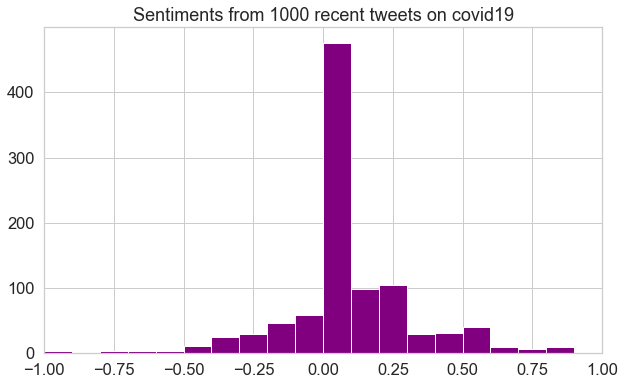

In [10]:
## Histogram of tweet sentiments

import numpy as np

bin_range = np.arange(-1, 1, 0.1)

fig, ax = plt.subplots(figsize=(10, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=bin_range,
             ax=ax,
             color="purple")

plt.xlim(-1, 1)
plt.title("Sentiments from 1000 recent tweets on covid19")
plt.show()

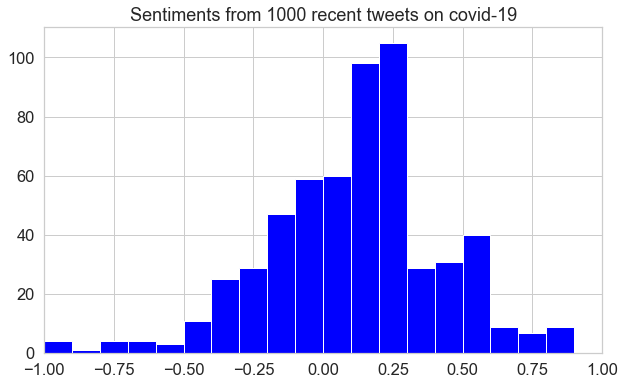

In [11]:
# Remove polarity values which equal to zero to get more valuable distribution

sentiment_df_nz = sentiment_df[sentiment_df.polarity_score != 0]

fig, ax = plt.subplots(figsize=(10, 6))

# Plot histogram with break at zero
sentiment_df_nz.hist(bins=bin_range,
             ax=ax,
             color="blue")

plt.xlim(-1, 1)
plt.title("Sentiments from 1000 recent tweets on covid-19")
plt.show()

In [12]:
## 10 most positive tweets about covid-19

sentiment_df_nz_sorted = sentiment_df_nz.sort_values('polarity_score', ascending=False)

pd.set_option('display.max_colwidth', None)

sentiment_df_nz_sorted.head(10)

,polarity_score,tweet
957,1.00,Do your best friends This crisis teaches me the importance of being prepared for rainy days Im doing my best I
12,1.00,Why Dua Lipas highenergy disco bangers are perfect for selfisolation
930,1.00,Thank you Uganda for gifting us the best coronavirus PSA song of them all
118,1.00,The UNITED STATES OF AMERICA The Best Country in the WorldSTILL WILL NOT TEST ITS CITIZENS for
965,1.00,Best discussion Ive heard on what needs to be done NOW coronavirus Covid19 CoronaLockdown cc JohnTory
345,1.00,Yes I imagine the best way to contain this virus is to ensure a group of people goes doortodoor across every res
475,1.00,In This Emergency Mom Knows Best
767,1.00,Quite impressed with the multisector response to the COVID19 crisis in Lagos Could Lagos be the blueprint for the
774,1.00,timesnowsports TimesNow shoaib100mph Our politicians take excellent care of their lungs Convid19 or no Covid19
454,0.85,My dear friend was inspired to write this beautiful tribute to tomhanks when Tom and his wife ritawilson were so


In [13]:
## 10 most negative tweets about covid-19

pd.set_option('display.max_colwidth', None)

sentiment_df_nz_sorted.tail(10)

,polarity_score,tweet
315,-0.700000,Thats a really bad idea during a pandemic GovWhitmer
892,-0.714286,Chris Cuomo Calls Out Defining Flaws of Trump Amid Coronavirus Pandemic They Are Literally Making Us Sick
788,-0.800000,elmsandr actioncookbook Can I come over Damn I cant Stupid coronavirus
150,-0.800000,AlYepez2 aubreyhuff MLB NHL NFL NBA Moron add up the 4 odds he gave for reaching one of the 4 pro sports a
960,-0.800000,An imbecile at the head of the US government would always be a problem But an imbecile so narcissistic that he el
421,-0.857143,mitchellvii You seriously a sick evil man News flash that trump bubble you encase yourself in is not COVID 19 pro
234,-1.000000,The worst part about all of this is that if she should need to go into a home for any reason COVID19 has made dam
880,-1.000000,When will you respect your teachers who are on the front line So disgusted NYCMayor NYCChancellor
5,-1.000000,cats can get coronavirus this is the worst news ever
249,-1.000000,Yes Yes Accolades to journalists bringing us facts at this horrible time of contagion amp death


## Word frequency analysis

In [14]:
## making a list of lists with lower case words from each tweet

lcase_words_tweets = [tweet.lower().split() for tweet in tweets_no_urls]
lcase_words_tweets[:2]

[['some',
  'of',
  'my',
  'coronavirus',
  'songseanmcconnell',
  'jackblack',
  'sportsradio610'],
 ['if',
  'you',
  'can',
  'hold',
  'the',
  'last',
  'long',
  'note',
  'in',
  'dont',
  'forget',
  'about',
  'us',
  'it',
  'is',
  'proof',
  'that',
  'you',
  'do',
  'not',
  'have',
  'the',
  'coronavirus']]

In [15]:
# Flattened list of all words across all tweets
all_words_tweets = list(itertools.chain(*lcase_words_tweets))

# Create counter
counts_no_urls = collections.Counter(all_words_tweets)
counts_no_urls.most_common(10)

[('the', 552),
 ('to', 410),
 ('coronavirus', 350),
 ('of', 335),
 ('covid19', 286),
 ('a', 276),
 ('in', 249),
 ('and', 207),
 ('is', 202),
 ('for', 194)]

In [16]:
## downloading stop words library in order to filter out stop words, commonly ysed words like 'a' or 'the'

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stop_words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\I22247\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [17]:
# Remove stop words from each tweet list of words with nested list comprehension
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in lcase_words_tweets]

tweets_nsw[1]

['hold',
 'last',
 'long',
 'note',
 'dont',
 'forget',
 'us',
 'proof',
 'coronavirus']

In [18]:
# same counter of most common words now without stop words

all_words_nsw = list(itertools.chain(*tweets_nsw))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(20)

[('coronavirus', 350),
 ('covid19', 286),
 ('people', 67),
 ('new', 60),
 ('us', 56),
 ('trump', 49),
 ('cases', 44),
 ('amp', 37),
 ('first', 35),
 ('get', 33),
 ('via', 32),
 ('time', 31),
 ('pandemic', 30),
 ('covid', 30),
 ('positive', 29),
 ('news', 29),
 ('death', 29),
 ('test', 27),
 ('right', 26),
 ('world', 25)]

In [19]:
## get rid of collection words which are skewing the frequency

collection_words = ['covid19', 'covid 19', 'covid-19', 'covid', "19", "coronavirus", "virus", "corona", 'amp', '19', 'im']
tweets_nsw_nc = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw]

In [20]:
# Flatten list of words in cleaned tweets_nsw_nc
all_words_nsw_nc = list(itertools.chain(*tweets_nsw_nc))

# Create counter of words in clean tweets
counts_nsw_nc = collections.Counter(all_words_nsw_nc)
counts_nsw_nc.most_common(20)

[('people', 67),
 ('new', 60),
 ('us', 56),
 ('trump', 49),
 ('cases', 44),
 ('first', 35),
 ('get', 33),
 ('via', 32),
 ('time', 31),
 ('pandemic', 30),
 ('positive', 29),
 ('news', 29),
 ('death', 29),
 ('test', 27),
 ('right', 26),
 ('world', 25),
 ('one', 24),
 ('dont', 22),
 ('would', 22),
 ('help', 22)]

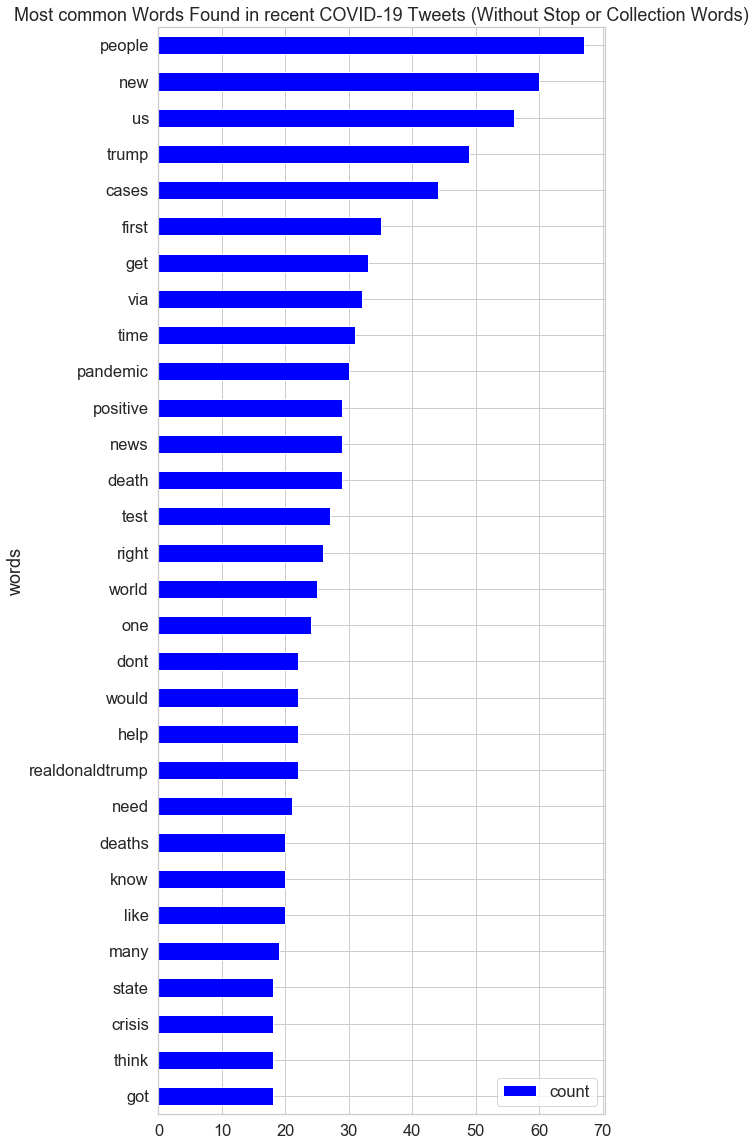

In [21]:
# plotting the most frequent words

all_words_nsw_nc_df = pd.DataFrame(counts_nsw_nc.most_common(30),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 20))

# Plot horizontal bar graph
all_words_nsw_nc_df.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="blue")

ax.set_title("Most common Words Found in recent COVID-19 Tweets (Without Stop or Collection Words)")
plt.show()

## network analysis

In [22]:
import nltk
from nltk import bigrams

# Create list of lists containing bigrams (n-gram for n=2) in tweets
terms_bigram = [list(bigrams(tweet)) for tweet in tweets_nsw_nc]

# View bigrams for the first tweet
terms_bigram[1]

[('hold', 'last'),
 ('last', 'long'),
 ('long', 'note'),
 ('note', 'dont'),
 ('dont', 'forget'),
 ('forget', 'us'),
 ('us', 'proof')]

In [23]:
# Flatten list of bigrams in cleaned tweets tweets_nsw_nc
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams to determine most common bigrams (pairs of sequential words)
bigram_counts = collections.Counter(bigrams)
bigram_counts.most_common(10)

[(('new', 'york'), 12),
 (('new', 'cases'), 11),
 (('confirmed', 'cases'), 9),
 (('death', 'toll'), 9),
 (('tested', 'positive'), 8),
 (('first', 'death'), 6),
 (('weeks', 'trump'), 5),
 (('trump', 'failed'), 5),
 (('failed', 'biggest'), 5),
 (('biggest', 'test'), 5)]

In [24]:
## creating dataframe of most common bigrams

bigram_df = pd.DataFrame(bigram_counts.most_common(40),
                             columns=['bigram', 'count'])

bigram_df

,bigram,count
0,"(new, york)",12
1,"(new, cases)",11
2,"(confirmed, cases)",9
3,"(death, toll)",9
4,"(tested, positive)",8
5,"(first, death)",6
6,"(weeks, trump)",5
7,"(trump, failed)",5
8,"(failed, biggest)",5
9,"(biggest, test)",5


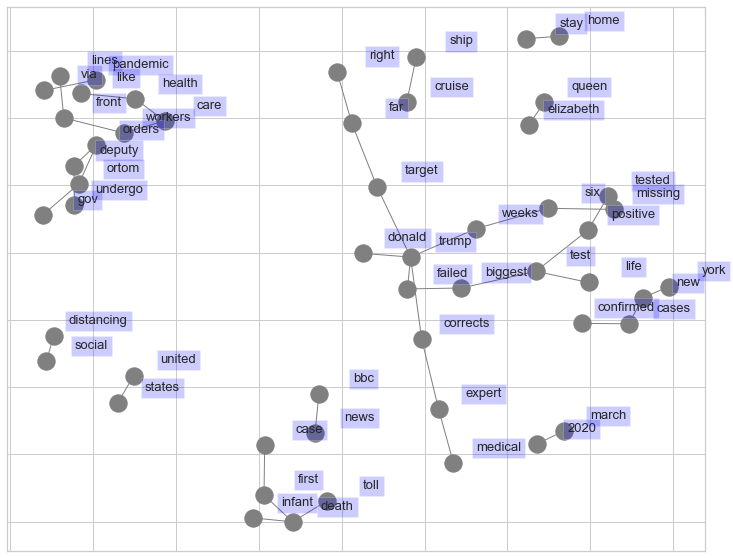

In [28]:
## Plotting network of most common bigrams

import networkx as nx

# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')

# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

fig, ax = plt.subplots(figsize=(12.5, 10))
pos = nx.spring_layout(G, k=1)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=12,
                 width=1,
                 edge_color='grey',
                 node_color='grey',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='blue', alpha=0.2),
            horizontalalignment='center', fontsize=13)
    
plt.show()

## Exploring additional tweet attributes with Cursor

In [26]:
tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2020-02-24').items(500)

users_locs = [[tweet.user.screen_name, tweet.user.location] for tweet in tweets]

In [32]:
users_locs[:5]

[['davewilliams1', 'Manchester UK'],
 ['reubenmahaffy', 'Edmonton, Canada'],
 ['BorisPaloma', 'USA'],
 ['HenaZuberi', ''],
 ['uItmyuoi', '']]

In [27]:
## Creating dataframe of handles and user-defined locations

users_locs_df = pd.DataFrame(data=users_locs, columns=('users', 'locations'))
users_locs_df.head(20)

,users,locations
0,davewilliams1,Manchester UK
1,reubenmahaffy,"Edmonton, Canada"
2,BorisPaloma,USA
3,HenaZuberi,
4,uItmyuoi,
5,Lindz_Jay,"Atlanta, GA"
6,leighM1995,"Donegal, Ireland"
7,TheReal_KDubb,"LA,Houston, NYC, ATL,Tampa"
8,CharleneWykman,"Leeds, England"
9,Judgedg1991,USA


In [33]:
## Replacing blanks with NaN vals

users_locs_df = users_locs_df.replace('',np.nan)
users_locs_df.head(20)

,users,locations
0,davewilliams1,Manchester UK
1,reubenmahaffy,"Edmonton, Canada"
2,BorisPaloma,USA
3,HenaZuberi,NaN
4,uItmyuoi,NaN
5,Lindz_Jay,"Atlanta, GA"
6,leighM1995,"Donegal, Ireland"
7,TheReal_KDubb,"LA,Houston, NYC, ATL,Tampa"
8,CharleneWykman,"Leeds, England"
9,Judgedg1991,USA


In [34]:
## Dropping NaN rows

users_locs_df = users_locs_df.dropna()
users_locs_df.head(20)

,users,locations
0,davewilliams1,Manchester UK
1,reubenmahaffy,"Edmonton, Canada"
2,BorisPaloma,USA
5,Lindz_Jay,"Atlanta, GA"
6,leighM1995,"Donegal, Ireland"
7,TheReal_KDubb,"LA,Houston, NYC, ATL,Tampa"
8,CharleneWykman,"Leeds, England"
9,Judgedg1991,USA
10,SeanMiDoyle,"Washington, DC"
11,arielval1,Florida


In [35]:
len(users_locs_df)

382

(-0.5, 999.5, 599.5, -0.5)

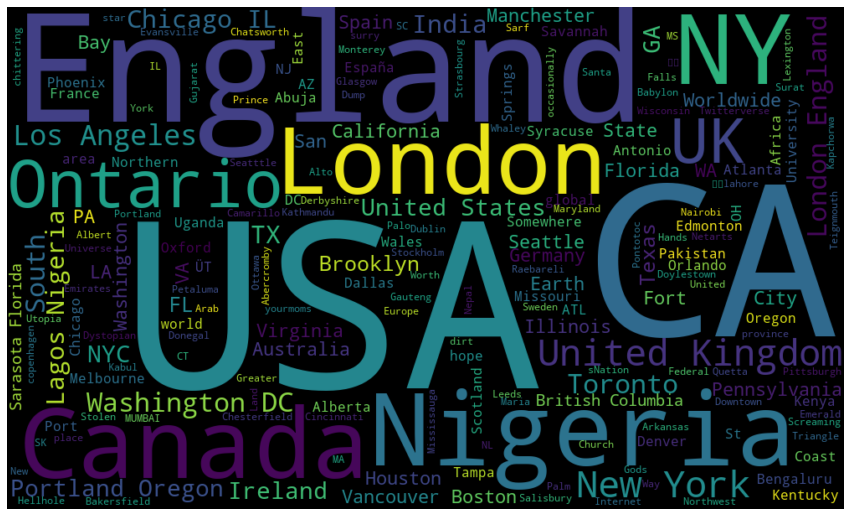

In [36]:
## turning list of locs into one big string and visualising location counts as WordCloud

all_locs_string = ' '.join(users_locs_df['locations'].tolist())

from wordcloud import WordCloud

word_cloud = WordCloud(width=1000, height=600).generate(all_locs_string)

plt.figure(figsize=(15,15))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')

In [37]:
## determining most popular tweet based on count of retweets

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2020-02-24').items(500)

users_locs_rts = [[tweet.user.screen_name, tweet.user.location, tweet.retweet_count, tweet.created_at, tweet.text] for tweet in tweets]
users_locs_rts[:5]


[['packrat220',
  '',
  0,
  datetime.datetime(2020, 3, 28, 21, 51, 41),
  '"Hey girl, you going to give me some of that post-coronavirus pussy?"'],
 ['prairielites',
  '',
  0,
  datetime.datetime(2020, 3, 28, 21, 51, 41),
  "Coronavirus can't stop border wall - Washington Times https://t.co/JDggaAKS6p"],
 ['TishaLyles_TL',
  'Los Angeles, CA',
  0,
  datetime.datetime(2020, 3, 28, 21, 51, 40),
  'I am praying daily that something is done for the less fortunate.  Because in the long run, the lesser communities… https://t.co/6Vnlo5cXLy'],
 ['jeremy_maxie',
  '',
  0,
  datetime.datetime(2020, 3, 28, 21, 51, 40),
  'Was checking the JHU interactive COVID-19 map today.  US was around 116k.  Refreshed an hour later and it was 119k.'],
 ['mhdksafa',
  '',
  0,
  datetime.datetime(2020, 3, 28, 21, 51, 40),
  'This morning, I decided to pay in advance the bills of all the small SMEs with which we work and our staff salaries… https://t.co/yhmFghgZ3t']]

In [38]:
## Creating dataframe with attributes including retweets and timestamp

users_locs_rts_df = pd.DataFrame(data=users_locs_rts, columns=('user', 'location', 'retweets', 'time', 'tweet'))
users_locs_rts_df.head(20)

,user,location,retweets,time,tweet
0,packrat220,,0,2020-03-28 21:51:41,"""Hey girl, you going to give me some of that post-coronavirus pussy?"""
1,prairielites,,0,2020-03-28 21:51:41,Coronavirus can't stop border wall - Washington Times https://t.co/JDggaAKS6p
2,TishaLyles_TL,"Los Angeles, CA",0,2020-03-28 21:51:40,"I am praying daily that something is done for the less fortunate. Because in the long run, the lesser communities… https://t.co/6Vnlo5cXLy"
3,jeremy_maxie,,0,2020-03-28 21:51:40,Was checking the JHU interactive COVID-19 map today. US was around 116k. Refreshed an hour later and it was 119k.
4,mhdksafa,,0,2020-03-28 21:51:40,"This morning, I decided to pay in advance the bills of all the small SMEs with which we work and our staff salaries… https://t.co/yhmFghgZ3t"
5,susaun28,,0,2020-03-28 21:51:40,Heartbreaking Infant death due to #COVID19 \nThis is a nightmare. When will people see the plague we have in the WH?… https://t.co/GDQtCIXcjv
6,Chevetta2,,0,2020-03-28 21:51:40,It’s very clear our gov @AsaHutchinson doesn’t give a single fuck about the people of Arkansas he’s just more conc… https://t.co/rf5UTRwo9v
7,TXGamingEmpire,,0,2020-03-28 21:51:40,"Coming soon, busy bustin COVID-19 bots https://t.co/q9vdPvBCR0"
8,HakeimBaBa,Nigeria,0,2020-03-28 21:51:40,"@Mss_Deeynah BREAKING: Queen Elizabeth Tested Positive For COVID-19, Buckingham Palace Confirms… https://t.co/7cfktpdNdp"
9,redlipsandboots,Northern California,0,2020-03-28 21:51:40,@countymendocino Thanks for putting out the numbers.\nCan you explain how different we are from neighboring Lake Cou… https://t.co/Ma0BPnNz7R


In [39]:
## Sorting to see most popular tweets

users_locs_rts_df.sort_values('retweets', ascending=False)

,user,location,retweets,time,tweet
386,evankirstel,"Boston, MA",3,2020-03-28 21:51:13,"Man, 40, dies ‘unable to breathe’ in #MiamiBeach after #coronavirus infection https://t.co/2yuzTcNjIl #Florida… https://t.co/hKJbw3CECd"
420,Local24CaitlinM,"Memphis, TN",1,2020-03-28 21:51:10,A woman in Southaven is hoping to inspire others to show their support for healthcare workers tirelessly helping fi… https://t.co/9dQWW9Wh7c
103,ShamsherZain,Bradford and 10x miles Radius.,1,2020-03-28 21:51:34,Boris Johnson: Test all frontline care workers for #coronavirus - Sign the Petition! https://t.co/6ygHkFtA8y via @UKChange
474,RepDavidRouzer,,1,2020-03-28 21:51:07,"The latest on the coronavirus relief bill signed into law by the President, and more info on the stay-at-home order… https://t.co/JeNXNVJDdw"
139,422DJ,Nashville TN ✈️ Seagrove FL,1,2020-03-28 21:51:31,The COVID Tracking Project - US Historical Data #COVID #corona #coronavirus #CoronaVirusUpdate #Covid_19 #covid19 https://t.co/i9NuwrQw4h
...,...,...,...,...,...
163,theoceanlawyers,"West Palm Beach, FL",0,2020-03-28 21:51:29,Destination Easter. Column: Donald Trump’s coronavirus pandemic death cult — everyone’s welcome! - Chicago Tribune https://t.co/E6xV2VRgaZ
162,JulieGem87,"Indiana, USA",0,2020-03-28 21:51:29,@jamesggilmore @RepTedBudd I thought Budd voted against Phase 3 of the coronavirus stimulus package.
161,gadsio,"Tamworth,UK",0,2020-03-28 21:51:29,@Mic68220690Tree Sexy as hell. Yes covid 19 sucks. Xx♥️♥️♥️
160,LadyMeerket,🇺🇸🇺🇸🇺🇸🇬🇧,0,2020-03-28 21:51:29,Coronavirus: NHS turns to big tech to tackle Covid-19 hot spots https://t.co/Sc2V2ys1cp


In [40]:
# Determining timeframe over which the 500 most recent COVID-19 tweets have been posted
# firstly the earliest tweet

users_locs_rts_df['time'].min()

Timestamp('2020-03-28 21:51:06')

In [41]:
# last tweet

users_locs_rts_df['time'].max()

Timestamp('2020-03-28 21:51:41')

In [42]:
# 35 seconds
# Taking a more detailed look at the rate of COVID-19 related tweets using a groupby

users_locs_rts_df.groupby('time').count().sort_values('user')

,user,location,retweets,tweet
time,,,,
2020-03-28 21:51:41,2,2,2,2
2020-03-28 21:51:28,8,8,8,8
2020-03-28 21:51:16,9,9,9,9
2020-03-28 21:51:24,9,9,9,9
2020-03-28 21:51:31,10,10,10,10
2020-03-28 21:51:26,10,10,10,10
2020-03-28 21:51:32,11,11,11,11
2020-03-28 21:51:25,11,11,11,11
2020-03-28 21:51:17,11,11,11,11
